In [1]:
import pandas as pd
import numpy as np
import csv


In [3]:
L24_total_df = pd.read_csv('csv_raw/ER_L24_t1.csv')
L24_total_df.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,NM_017847,112.294090,-0.662837,0.273813,-2.420767,0.015488,0.120137
1,NM_001003803,182.333378,-0.132781,0.224270,-0.592060,0.553811,0.801922
2,NM_001003800,354.785989,0.072009,0.368656,0.195327,0.845137,0.946766
3,NM_016649,208.700788,-0.619136,0.286961,-2.157560,0.030962,0.178877
4,NM_016647,148.352948,0.746495,0.615334,1.213155,0.225071,0.518246


In [16]:
L24_total_filtered = L24_total_df[L24_total_df['pvalue'] < 0.05]
len(L24_total_filtered)

1708

In [26]:
L24_total_filtered = L24_total_filtered.sort_values(by=['log2FoldChange'])
geneNum=sum((L24_total_filtered['log2FoldChange']>1)*1)
L24_total_filtered.tail()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4518,NM_019554,2782.601937,1.493255,0.381964,3.909413,9.252073e-05,4.351943e-03
2679,NM_004074,715.242051,1.584397,0.245659,6.449588,1.121548e-10,2.240292e-07
689,NM_000992,359.205401,1.593513,0.336520,4.735269,2.187652e-06,3.972577e-04
4546,NM_033625,148.300167,1.625403,0.517227,3.142532,1.674935e-03,3.020933e-02
3978,NM_005694,54.781701,1.697012,0.353176,4.805007,1.547461e-06,3.253740e-04


#### The interested Genes

In [27]:
topGenes = L24_total_filtered['Unnamed: 0'].tail(geneNum)
botGenes = L24_total_filtered['Unnamed: 0'].head(geneNum)
notTopGenes = L24_total_filtered['Unnamed: 0'].head(len(L24_total_filtered)-geneNum)

#### Now get vals from TE t2 vs t1

In [28]:
TE_2_1 = pd.read_csv('csv_raw/TE_t2_t1.csv')

In [32]:
topTE = TE_2_1[TE_2_1['Unnamed: 0'].isin(topGenes)]
botTE = TE_2_1[TE_2_1['Unnamed: 0'].isin(botGenes)]
notTopTE = TE_2_1[TE_2_1['Unnamed: 0'].isin(notTopGenes)]
len(topTE)

49

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'TE t2 vs t1 FC')

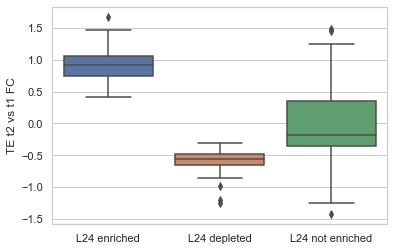

In [73]:
data = {'L24 enriched':topTE['log2FoldChange'], 'L24 depleted':botTE['log2FoldChange'], 'L24 not enriched':notTopTE['log2FoldChange']}
df =  pd.DataFrame(data) 
sns.set(style="whitegrid")
ax=sns.boxplot(data=df)
plt.ylabel('TE t2 vs t1 FC')
plt.savefig('')

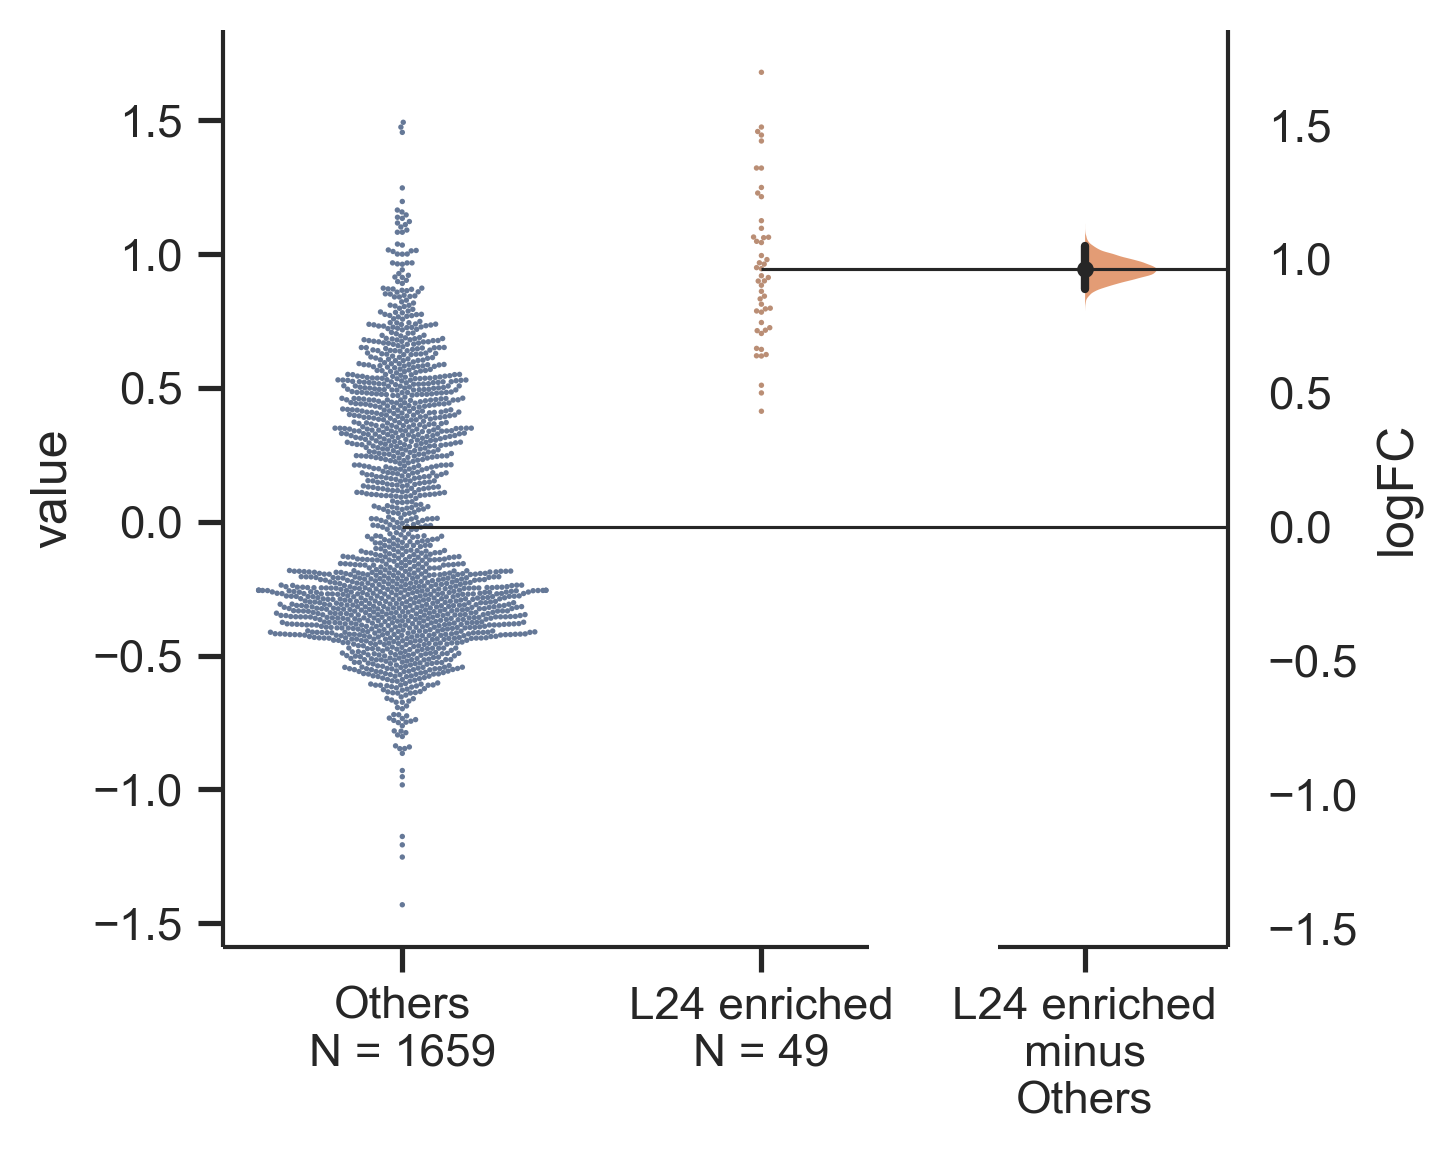

In [82]:
import dabest
data = {'Others':notTopTE['log2FoldChange'],'L24 enriched':topTE['log2FoldChange'],}
df = pd.DataFrame(data)
df_dabest = dabest.load(data = df,idx=("Others","L24 enriched"),paired=False,resamples=50000)
plt=df_dabest.mean_diff.plot(swarmplot_kwargs={"size":1.3},contrast_label="logFC",dpi=300,es_marker_size=3);
plt.savefig('coding/'+groupLabel+'/'+fileLabel+'_dabest.png',dpi=300)